# **Red Neuronal Zalando**
>
En esta red neuronal, se van a usar el conjunto de datos Fashion-MNIST, el cual esta formada por imagenes de productos de Zalando con el objetivo de crear una red neuronal, que nos permita distinguir entre 10 tipos de objetos.




In [1]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.12.0


In [2]:
fashion_mnist=keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [3]:
print("train_images.shape ",train_images.shape)

train_images.shape  (60000, 28, 28)


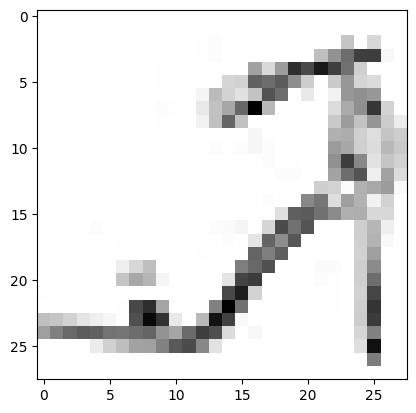

In [11]:
import matplotlib.pyplot as plt
plt.imshow(train_images[8], cmap=plt.cm.binary)

In [12]:
np.set_printoptions(precision=2, suppress=True, linewidth=120)
print(np.matrix(train_images[8]))

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   3   1   0   0   1   1   0   0   0   0  58   0  39   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   3   0   0   0   0   0   0   0  64 109 146 192 193   7   0]
 [  0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0  94  38  99 209 183 229 192 142  48   0   0   0]
 [  0   0   0   0   0   0   0   0   0   1   0   0   0   0  41  45 158 146 164 114  51   1  53 105  42  36   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  10  68  44  30  59 172 146   0  22   0  13 103 111 103   0   0]
 [  0   0   0   0   0   0   0   0   0   3   1   0  22  61  88 152 255  71   0   0   0   0  35  85 112 201  44   0]
 [  0   0   0   0   0   0   0   0   0   1   0   0  13  62 154  62   0   0   0   

In [5]:
print("test_images,shape",test_images.shape)

test_images,shape (10000, 28, 28)


In [6]:
print(train_images.dtype)

uint8


In [9]:
print(train_labels)

[9 0 0 ... 3 0 5]


In [16]:
print("min_value_label = ",np.min(train_labels))
print("max_value_label = ",np.max(train_labels))

min_value_label =  0
max_value_label =  9


Como hemos podido observar, en los datos de entrenamiento tenemos 60.000 imagenes de 28x28 con valores que van de [0,255], de manera similar en los datos de entrenamiento tenemos 10.000 imagenes de 28x28 con valores que van de[0,255].
>
En Cuanto a las etquietas, podem ver como cada etiqueta le corresponde un valor numérico entre 0 y 9, los cuales corresponden a la clase de ropa que representan.

In [21]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


# **Preparación de los datos**


>
Antes de pasar los datos a la red neuronal, estos como comentamos en el anterior proyecto, tienen que ser procesados para poder tener un mejor rendimiento de la red neuronal.
>
Como podemos observar,este ejemplo es muy parecido al ejemplo de los números escritos a mano, por lo tanto vamos a realizar un proceso muy similar, en concreto lo que vamos a hacer es

*   Cambiar el tiop de datos a float32
*   Escalar los valores a valores dentro del rango [0,1]
*   Convertir el tensor 2D a 1D, en este caso en lugar de hacer un reshape, vamos a usar otra técncia diferente.






In [17]:
train_images=train_images.astype('float32')
test_images=test_images.astype('float32')
train_images=train_images/255
test_images=test_images/255

In [18]:
print(train_images.dtype)

float32


In [19]:
np.set_printoptions(precision=2, suppress=True, linewidth=120)
print(np.matrix(train_images[8]))

[[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.01 0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.23 0.   0.15 0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.01 0.   0.   0.   0.   0.   0.   0.   0.25 0.43
  0.57 0.75 0.76 0.03 0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.37 0.15 0.39 0.82 0.72 0.9  0.75
  0.56 0.19 0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.16 0.18 0.62 0.57 0.64 0.45 0.2  0.   0.21
  0.41 0.16 0.14 0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.04 0.27 0.17 0.12 0.23 0.67 0.57 0.   0.09 0.   0.05
  0.4  0.44 0.4  0.

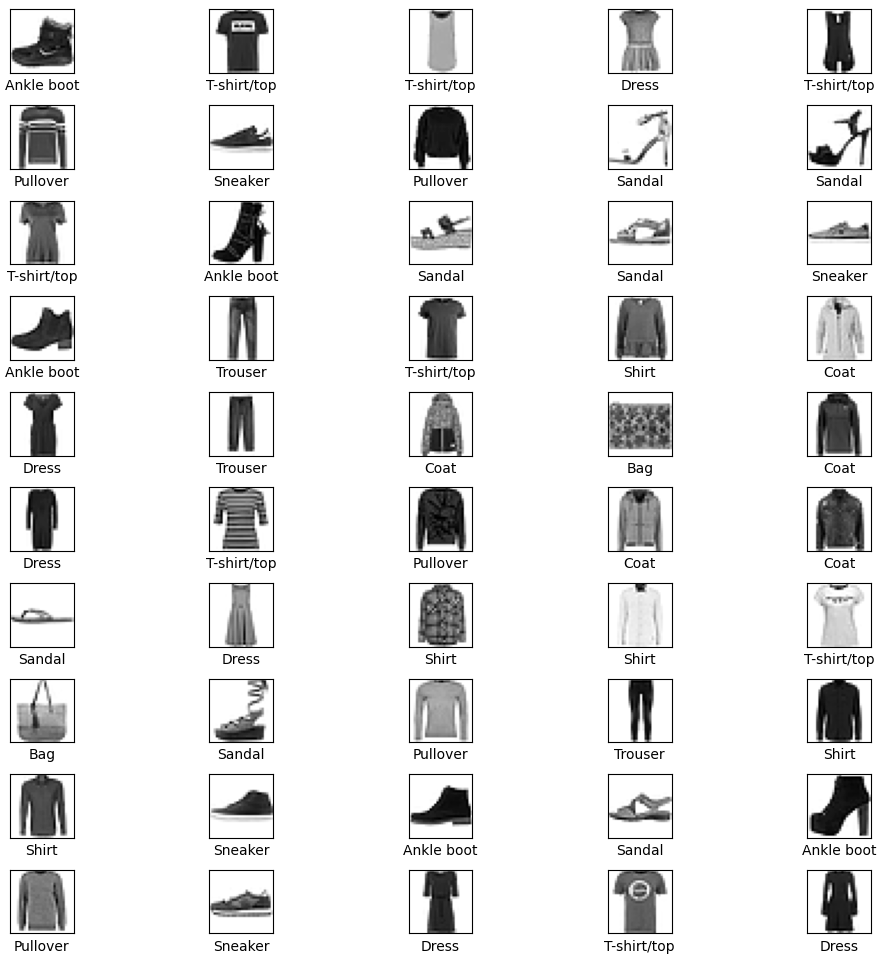

In [25]:
plt.figure(figsize=(12,12))
for i in range(50) :
  plt.subplot(10,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i],cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.subplots_adjust(hspace=0.5, wspace=0.5)


# **Definición del Modelo**
>
En esta sección vamos a definir la red neuronal que vamos a utilizar.
Vamos a definir un modelo muy similar al anterior, pero añadimos una primera capa del tipo Flatten.
>
Esta primera capa lo que hace es converitr las entradas, tensores 2D a tensores 1D, es decir la matriz de 28x28 la convierte en un vector de 784 entradas, posteriormente estas entradas son enviadas a las neuornas de la siguiente capa, de la misma forma que ocurria en el ejemplo anterior.
>
Las otras 2 capas, son las mismas que en el ejemplo anterior y también vamos a usar las funciones de activación sigmoid y softmax para obtener una distribución de probabilidad para las 10 clases.
>
Veamos que hacen exactamente las funciones de activacion.
# Sigmoid
Toma un valor real y lo mapea a un rango entre 0 y 1, la formula que utiliza es f(x)=1/(1+e^-x).
>
Esta función tiene la característica especial de ser continua y diferenciable en todo su dominio. Esto la hace adecuada para la retropropagación del error en el proceso de entrenamiento de redes neuronales, ya que la derivada de la función se puede calcular fácilmente.
>
La interpretación de la función sigmoid es que actúa como un "interruptor suave" que permite el flujo de información entre las neuronas de una red. Cuando el valor de entrada a la función sigmoid es grande (positivo o negativo), la salida tiende a 1 o 0 respectivamente. Cuando el valor de entrada es cercano a cero, la salida tiende a 0.5.

# SoftMax
Es una función de activación utilizada tipicamente en la capa de salida de redes neuronales para problemas de clasificación multiclase. Su objetivo principal es convertir las salidas de una red neuronal en una distribución de probabilidad sobre múltiples clases.
>
La función Softmax toma valores reales y los normaliza para obtener probabilidades en el rango de  [0,1], de modo que la suma de todas las probabilidades sea igual a 1. Esto permite que el modelo seleccione la clase más probable para la clasificación.
>
Esta función como hemos comentado, es especialmente útil para problemas de clasificación multiclase


In [29]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10,activation= 'softmax'))


# **Configuración del Modelo**

Este apartado va a ser muy similar a la configuración del modelo para clasificar número escritos a mano, ya que las características de los problemas son muy similares.


In [30]:
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# **Entrenamiento**

In [32]:
model.fit(train_images,train_labels,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 10s 2ms/step - loss: 1.8294 - accuracy: 0.4812
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.2561 - accuracy: 0.6615
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.9965 - accuracy: 0.7095
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8636 - accuracy: 0.7358
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7822 - accuracy: 0.7526
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.7259 - accuracy: 0.7641
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6842 - accuracy: 0.7714
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6514 - accuracy: 0.7804
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6249 - accuracy: 0.7887
Epoch 10/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.60

Como podemos observar a medida que vamos iterando, el error se va haciendo mas pequeño, esto como ya sabemos es debido a que los pesos se van actualizando, con el objetivo de reducir la perdida.

# **Evaluación del Modelo**

In [34]:
test_loss,test_accuracy=model.evaluate(test_images,test_labels)
print('Test accuracy : ',test_accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.6131 - accuracy: 0.7887
Test accuracy :  0.7886999845504761


La interpretación que podemos obtener es que la red neuronal ha clasificado correctamente el 78,87% de los ejemplos del conjunto.
>
Igual que en el caso anterior, se pueden considerar otras medidas que también tengan en cuenta la cantidad de Falsos Negativos o Falsos positivos, esto va a depender del ejemplo, como en este caso no son casos críticos no hace falta tenerlo en cuenta.
>
Si en lugar de clasificar ropa, clasifca setas entre venenosas y no venenosas, esta claro que un falso negativo es dramático, nos dice que una seta no es venenosa cuando si lo es, en cambio un falso positivo no es tan dramático, no diria que una seta es venenosa cuando no lo es.
>
La conclusión es que dependiendo del problema, necesitaremos contemplar otras métricas además del accuracy

# **Usando el Modelo Para hacer Predicciones**

In [38]:
predictions=model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [35]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#00FF00")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('black')


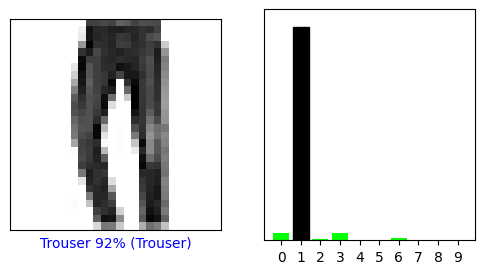

In [39]:
i = 5
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

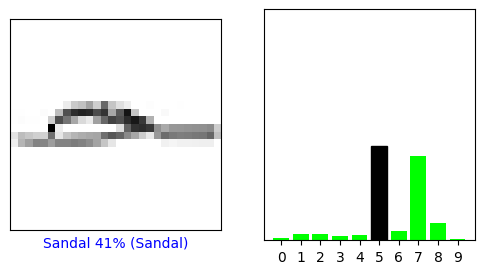

In [41]:
i=8
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions[i],test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions[i],test_labels)
plt.show()

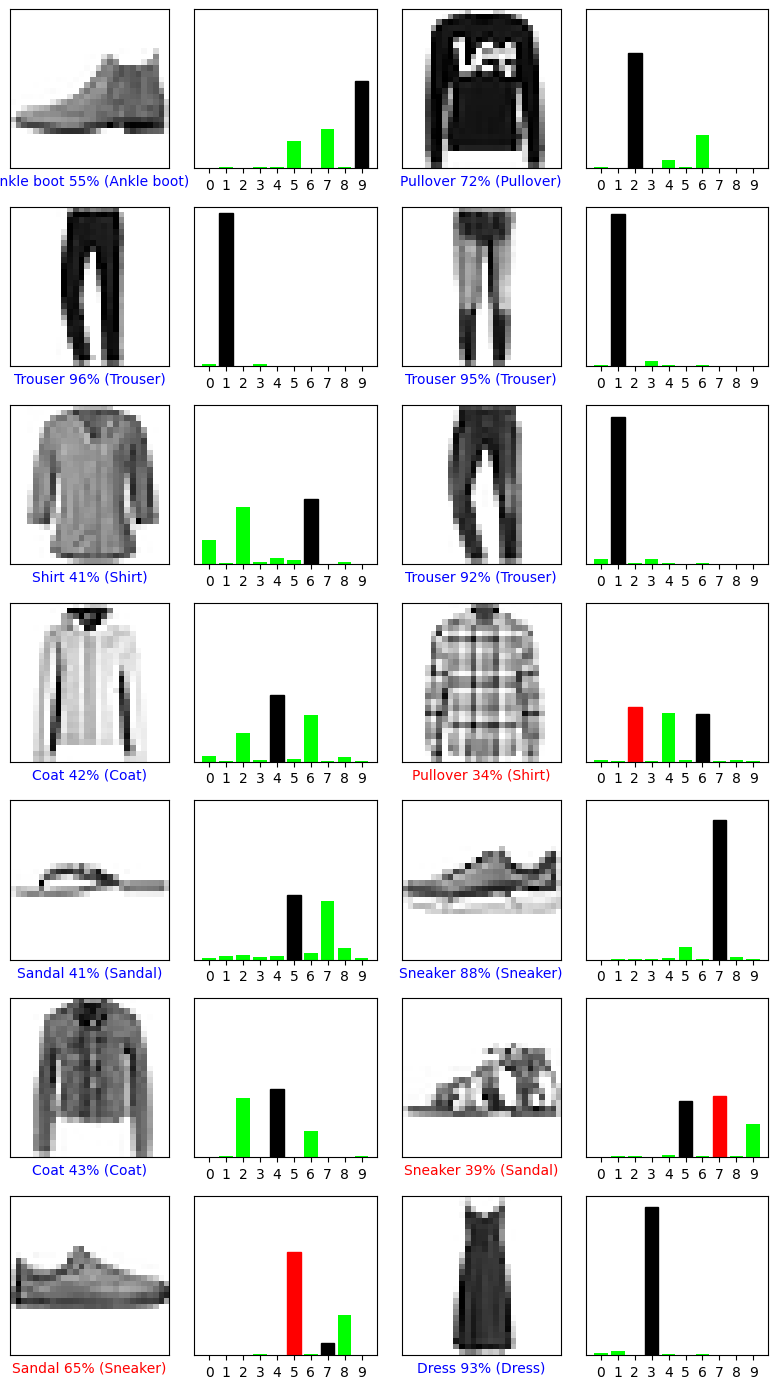

In [43]:
num_rows=7
num_cols=2
num_images=num_rows*num_cols
plt.figure(figsize=(2*2*num_cols,2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows,2*num_cols,2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()


# **Mejora del Modelo**
>
Vemaos si podemos realizar algunos cambios en el modelo, con tal de mejorar los resultados de este.
>
En particular vamos a cambiar el optimizador.El optimizador es el algoritmo usado por el modelo para actualizar los pesos de cada una de sus capas en el proceso de entrenamiento. Vamos a seleccionar el optimizador Adam

In [45]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=10)

test_loss, test_acc = model.evaluate(test_images,  test_labels)
print('\nTest accuracy:', test_acc)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.0616 - accuracy: 0.7166
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5804 - accuracy: 0.8191
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4809 - accuracy: 0.8390
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4436 - accuracy: 0.8465
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4231 - accuracy: 0.8522
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4099 - accuracy: 0.8551
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4007 - accuracy: 0.8587
Epoch 8/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3940 - accuracy: 0.8605
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3869 - accuracy: 0.8636
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 0.4431 

Podemos observar, como cmabiando el optimizador, hemos mejorado un 6% la precisión, esto nos hace pensar que hay muchos mas elementos a tener en cuenta cuando definimos y configuramos el proceso de aprendizaje de la red neuronal.


In [47]:
predictions=model.predict(test_images)

313/313 [==============================] - 0s 1ms/step


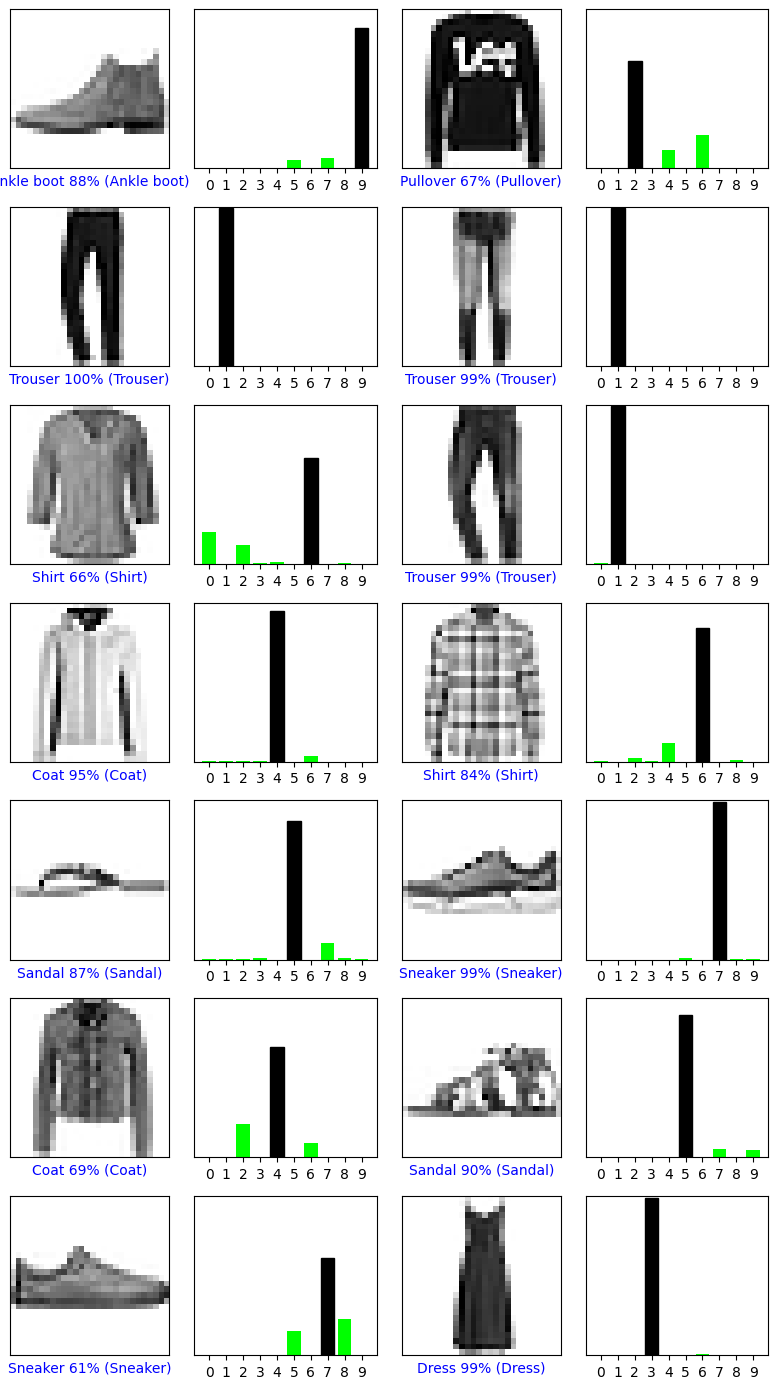

In [48]:
num_rows=7
num_cols=2
num_images=num_rows*num_cols
plt.figure(figsize=(2*2*num_cols,2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows,2*num_cols,2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()